# DECISION TREE

# 1. Data Preparation:

In [54]:
# import pakage

In [56]:
import pandas as pd

In [58]:
# load the dataset

In [62]:
df= pd.read_csv('heart_disease.csv')

In [68]:
# display the first 5 rows 

In [70]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,FALSE,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,FALSE,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,FALSE,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,FALSE,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,TRUE,1.5,flat,fixed defect,0


# Task 2: Exploratory Data Analysis (EDA)

In [79]:
# Handle missing values
from sklearn.impute import SimpleImputer
# Separate categorical and numerical columns
categorical_cols =df.select_dtypes(include=['object']).columns
numerical_cols =df.select_dtypes(exclude=['object']).columns
print("Categorical Columns:", categorical_cols)
print("\nNumerical Columns:", numerical_cols)
# Create an imputer object
imputer = SimpleImputer(strategy='mean')
# Fill missing values in numerical columns with mean
df[numerical_cols] = imputer.fit_transform(df[numerical_cols])
# Fill missing values in categorical columns with mode
imputer = SimpleImputer(strategy='most_frequent')
df[categorical_cols] = imputer.fit_transform(df[categorical_cols])

Categorical Columns: Index(['sex', 'cp', 'restecg', 'exang', 'slope', 'thal'], dtype='object')

Numerical Columns: Index(['age', 'trestbps', 'chol', 'fbs', 'thalch', 'oldpeak', 'num'], dtype='object')


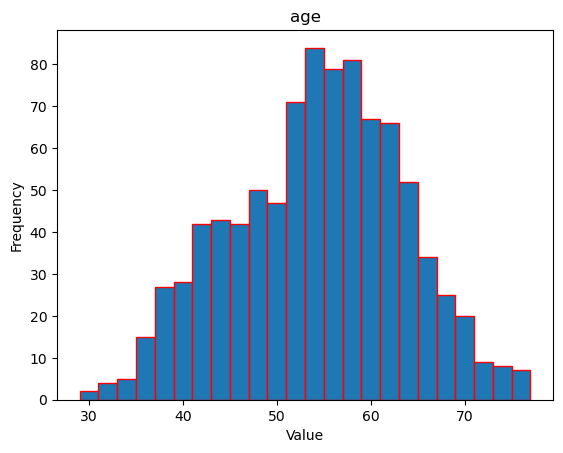

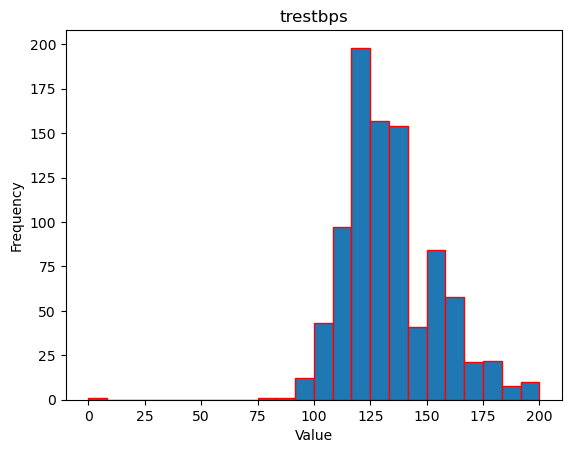

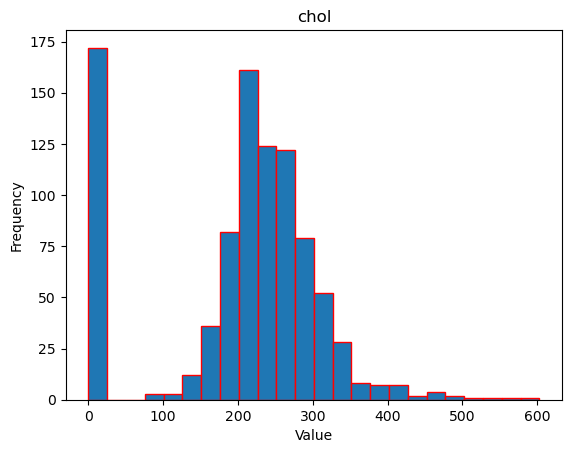

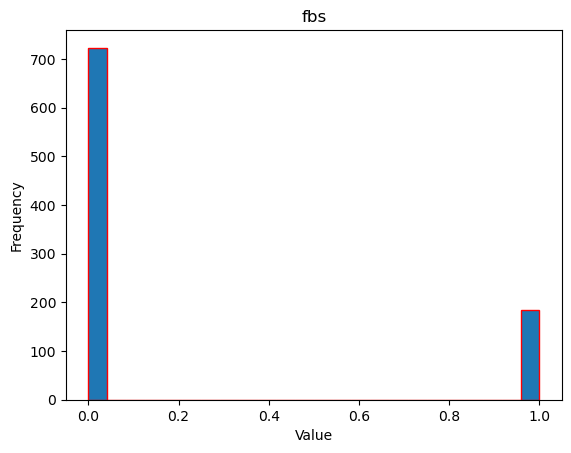

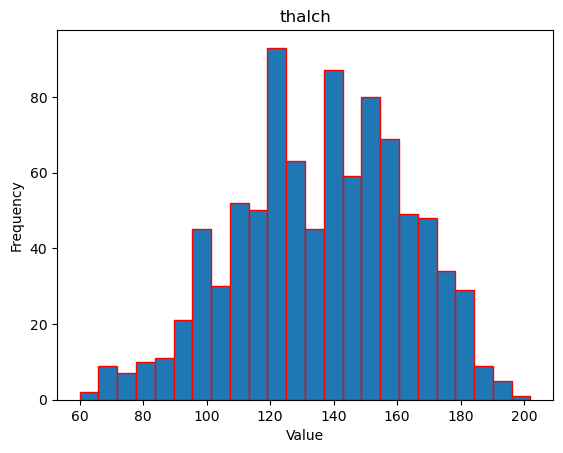

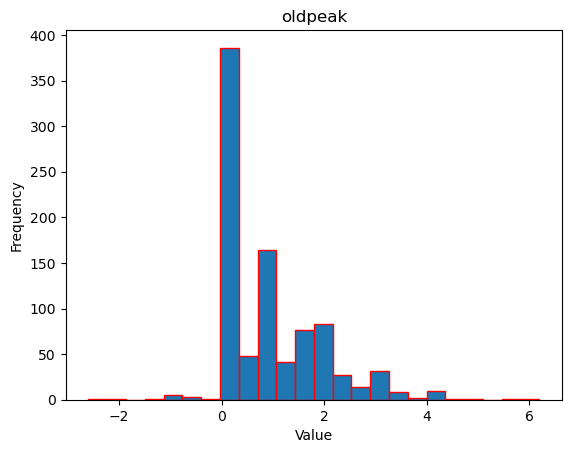

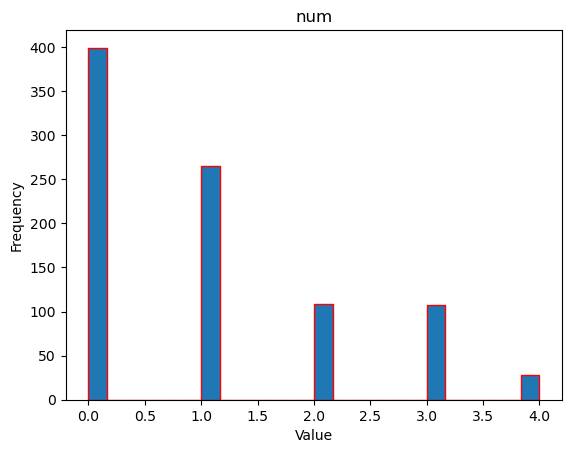

In [101]:
# Visualization 
import matplotlib.pyplot as plt
# Plot histograms for numerical columns
for col in numerical_cols:
    plt.hist(df[col], bins=24, edgecolor='red')
    plt.title(col)
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.show()

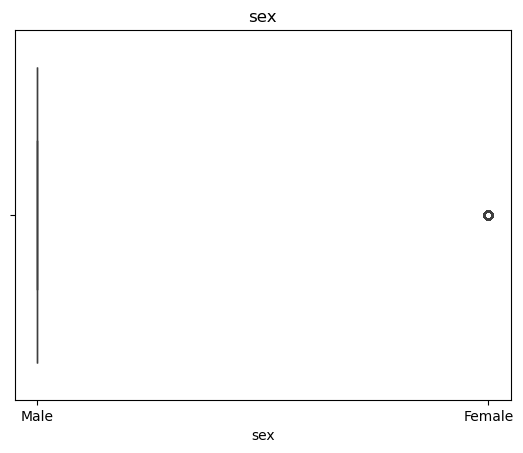

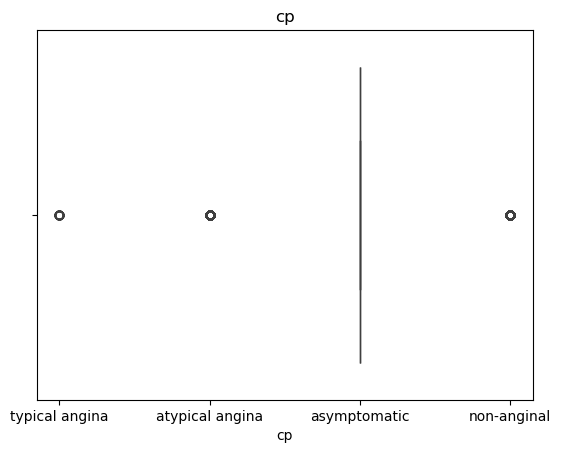

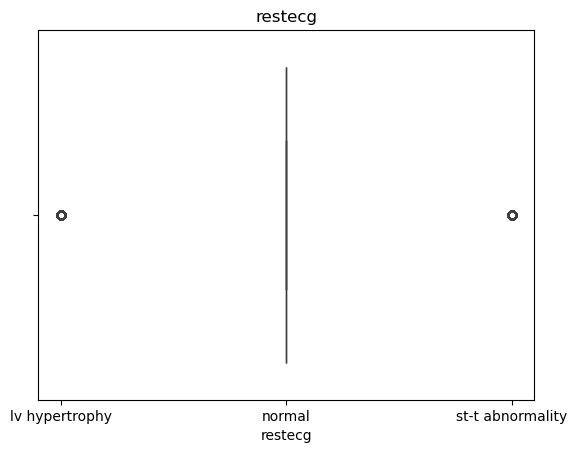

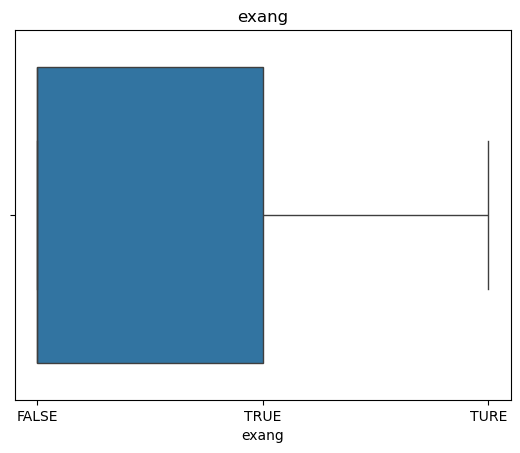

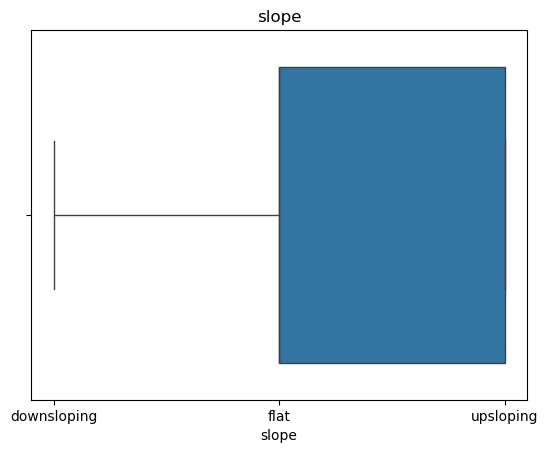

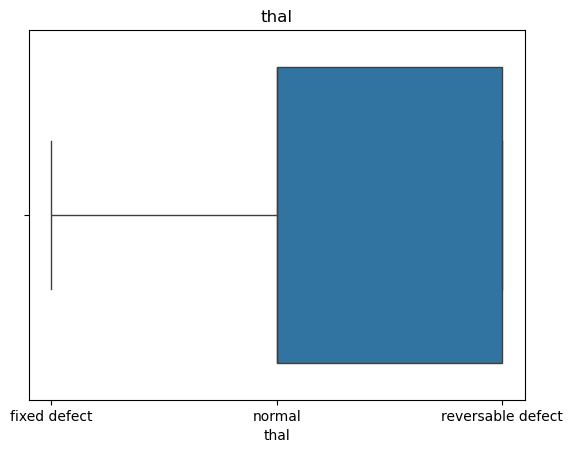

<Figure size 640x480 with 0 Axes>

In [109]:
#Visualization
import seaborn as sns
# Plot box plots for categorical columns
for col in categorical_cols:
    sns.boxplot(x=col, data=df)
    plt.title(col)
    plt.show()
    plt.tight_layout()

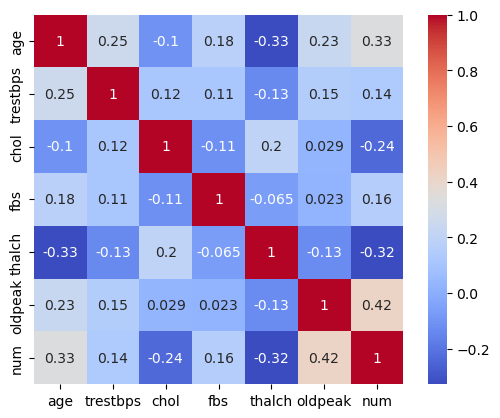

In [113]:
# Visualize the correlation matrix for numerical columns
corr_matrix = df[numerical_cols].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', square=True)
plt.show()

# 3. Feature Engineering

In [120]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, StandardScaler
# Encode categorical variables
le = LabelEncoder()
for col in categorical_cols:
 df[col] = le.fit_transform(df[col])
# Scale numerical features
scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

# 4. Decision Tree Classification

In [125]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# we can apply directly decision tree regressor.
df['num'] = pd.cut(df['num'], bins=[-float('inf'), 0, float('inf')], labels=[0, 1])

# Split the dataset into training and testing sets
X = df.drop('num', axis=1)
y = df['num']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Evaluate the model on the testing set
y_pred = dt_model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.7087912087912088

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.81      0.81       137
           1       0.41      0.40      0.40        45

    accuracy                           0.71       182
   macro avg       0.61      0.61      0.61       182
weighted avg       0.71      0.71      0.71       182


Confusion Matrix:
 [[111  26]
 [ 27  18]]


# 5. Hyperparameter Tuning

In [128]:
# import the gridsearchCV package
from sklearn.model_selection import GridSearchCV
# Define hyperparameter tuning space
param_grid = {
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy']
}

# Perform hyperparameter tuning using GridSearchCV
grid_search = GridSearchCV(dt_model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

Best Parameters: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_split': 10}
Best Score: 0.75764761454889


# Task 6: Model Evaluation and Analysis

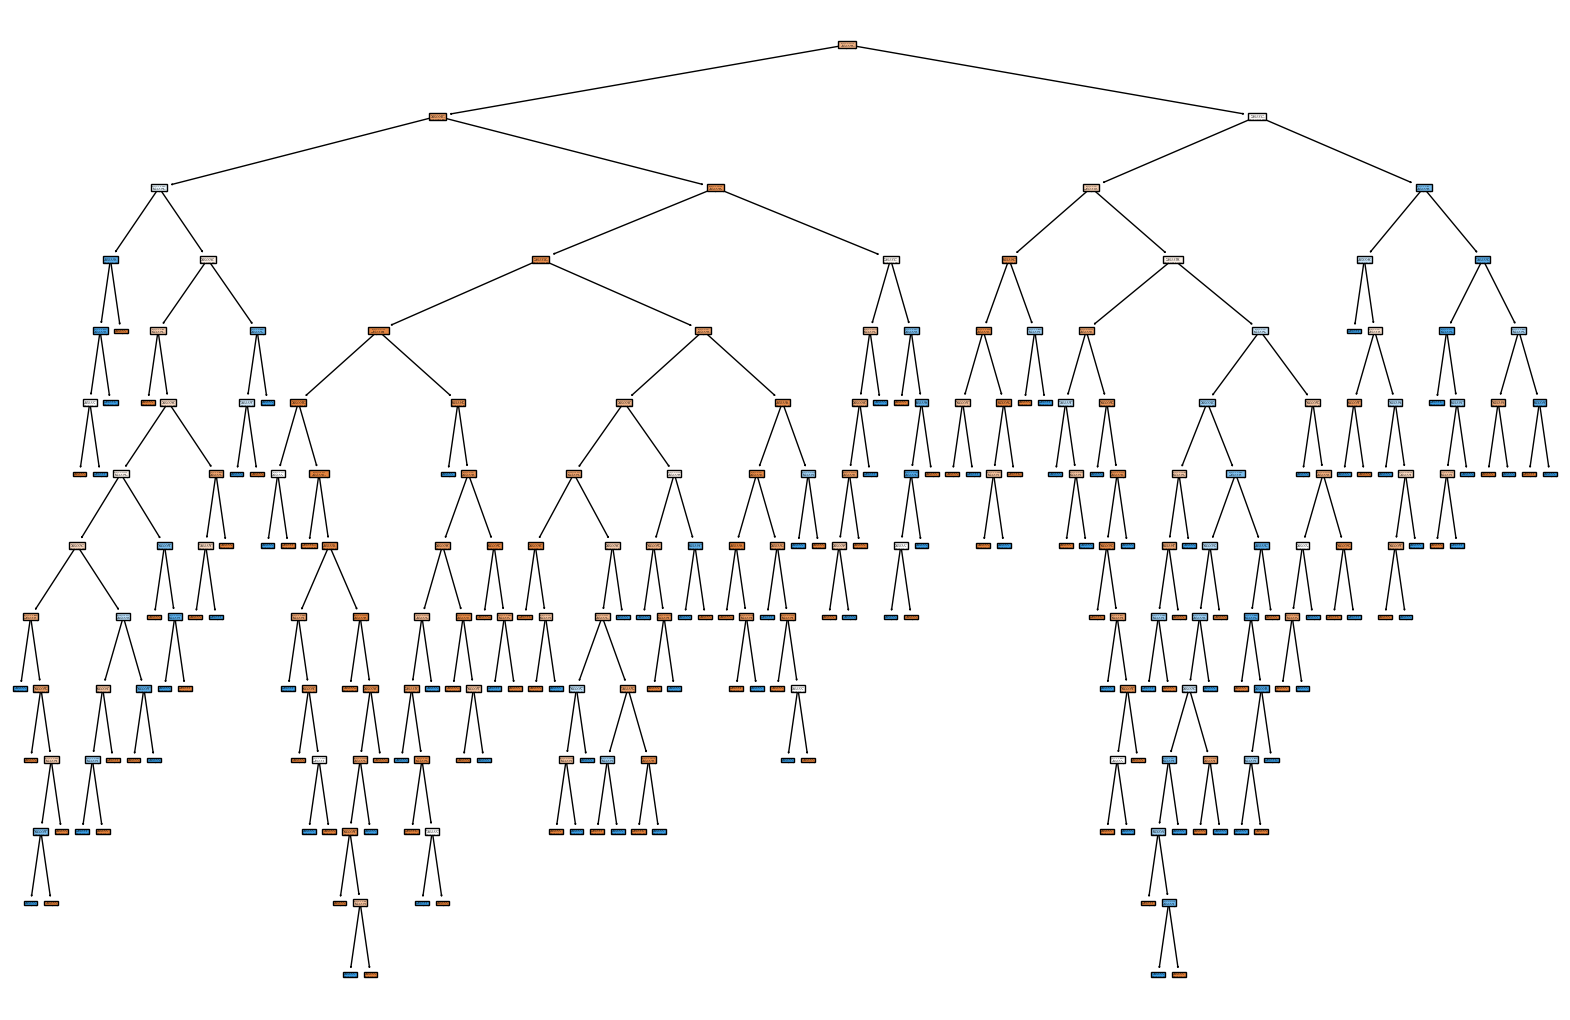

In [135]:
#import the plot_tree pakage
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
# decision tree structure visualized
plt.figure(figsize=(20,13))
plot_tree(dt_model, filled=True)
plot_params = {'fontsize': 13}
plt.show()

# **Interview Questions**


1. What are some common hyperparameters of decision tree models, and how do they affect the model's performanance?


2. What is the difference between the Label encoding and One-hot encoding?